In [1]:
import pandas as pd

data = pd.read_csv('apr10_out.csv')

In [24]:
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)

data = data[data['epoch'] == 30]
data.replace({'num_training_images' : -1}, 60000, inplace=True)

data.groupby(by=['seed', 'num_training_images', 'source_eps'], as_index=False).count()

# We have replicable results
data[data['num_training_images'] == 60000].sort_values(by=['source_eps', 'seed'])

,Unnamed: 0,epoch,nat_prec1,adv_prec1,nat_loss,adv_loss,train_prec1,train_loss,time,source_eps,target_ds,num_training_images,unfrozen_blocks,seed
230,6,30,91.649994,-1.0,0.247010,-1.0,93.388000,0.192977,4102.416349,0,cifar10,60000,1,10000000
370,6,30,91.229996,-1.0,0.253734,-1.0,92.921997,0.207406,4115.193131,0,cifar10,60000,1,10100000
363,6,30,91.629997,-1.0,0.251080,-1.0,93.014000,0.202244,4107.525496,0,cifar10,60000,1,10200000
412,6,30,91.399994,-1.0,0.254257,-1.0,92.680000,0.208204,4144.490301,0,cifar10,60000,1,10300000
405,6,30,91.839996,-1.0,0.243529,-1.0,93.405998,0.187658,4144.800157,0,cifar10,60000,1,10400000
34,6,30,94.389999,-1.0,0.177465,-1.0,99.433998,0.022571,4098.924747,3,cifar10,60000,1,10000000
384,6,30,94.529999,-1.0,0.178763,-1.0,99.416000,0.022956,4170.887979,3,cifar10,60000,1,10100000
734,6,30,94.529999,-1.0,0.178763,-1.0,99.416000,0.022956,4130.970232,3,cifar10,60000,1,10100000
377,6,30,94.619995,-1.0,0.178365,-1.0,99.367996,0.024515,4164.772151,3,cifar10,60000,1,10200000
741,6,30,94.619995,-1.0,0.178365,-1.0,99.367996,0.024515,4138.154636,3,cifar10,60000,1,10200000


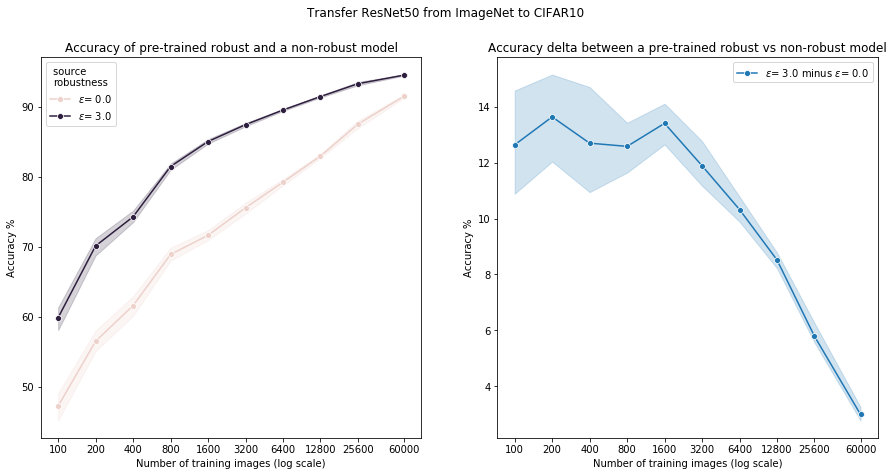

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the nominal

plt, axs = plt.subplots(1, 2, figsize=(15, 7))

ax = axs[0]
ax.set_xscale('log', basex=2)

import matplotlib.ticker
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

data['source_eps'].astype(str)
sns.lineplot(x='num_training_images', y='nat_prec1', hue='source_eps', hue_order=['0', '3'], marker='o', data=data, ci=99, ax=ax)

ax.set_xticks(data['num_training_images'].unique())
ax.set_xlabel('Number of training images (log scale)')
ax.set_ylabel('Accuracy %')
ax.set_title('Accuracy of pre-trained robust and a non-robust model')
ax.legend(['$\epsilon$= 0.0','$\epsilon$= 3.0'], title='source \nrobustness');

# get the delta

source_eps_0 = data[data['source_eps'] == 0].sort_values(by=['num_training_images','seed']).reset_index(drop=True)
source_eps_3 = data[data['source_eps'] == 3].sort_values(by=['num_training_images','seed']).reset_index(drop=True)

new_data = source_eps_0.copy()

new_data['nat_prec1_delta'] = source_eps_3['nat_prec1'] - source_eps_0['nat_prec1']

#plot the delta

import seaborn as sns
import matplotlib.pyplot as plt

ax = axs[1]
ax.set_xscale('log', basex=2)

import matplotlib.ticker
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

data['source_eps'].astype(str)
sns.lineplot(x='num_training_images', y='nat_prec1_delta', marker='o', data=new_data, ci=99, ax=ax)

ax.set_xticks(data['num_training_images'].unique())
ax.set_xlabel('Number of training images (log scale)')
ax.set_ylabel('Accuracy %')
ax.set_title('Accuracy delta between a pre-trained robust vs non-robust model');
ax.legend(['$\epsilon$= 3.0 minus $\epsilon$= 0.0']);

plt.suptitle('Transfer ResNet50 from ImageNet to CIFAR10')
plt.tight_layout;

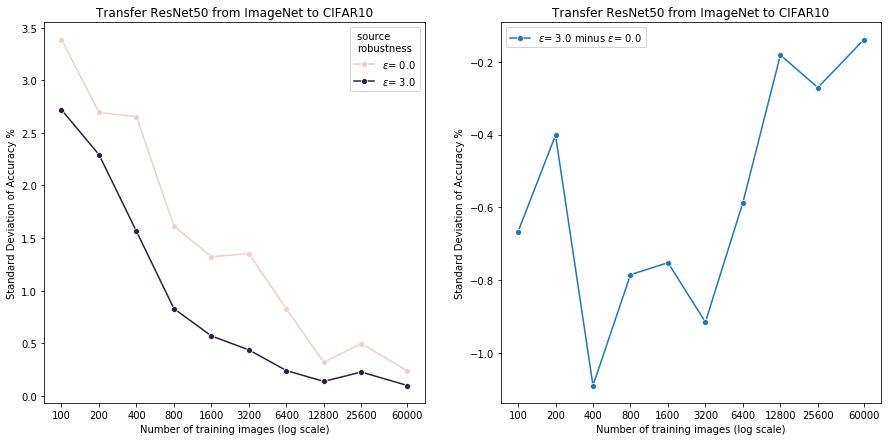

In [49]:
# get std data

import numpy as np

std_data = data.groupby(by=['num_training_images', 'source_eps'], as_index=True).std(ddof=1).loc[:, ['nat_prec1']]

std_data = var_data.reset_index()
std_data = var_data.rename(columns={'nat_prec1':'std'})

# plot std

import seaborn as sns
import matplotlib.pyplot as plt

plt, axs = plt.subplots(1, 2, figsize=(15, 7))

ax = axs[0]
ax.set_xscale('log', basex=2)

import matplotlib.ticker
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

data['source_eps'].astype(str)
sns.lineplot(x='num_training_images', y='std', hue='source_eps', marker='o', data=std_data, ci=99, ax=ax)

ax.set_xticks(data['num_training_images'].unique())
ax.set_xlabel('Number of training images (log scale)')
ax.set_ylabel('Standard Deviation of Accuracy %')
ax.set_title('Transfer ResNet50 from ImageNet to CIFAR10');
ax.legend(['$\epsilon$= 0.0','$\epsilon$= 3.0'], title='source \nrobustness');

# get variance delta

std_eps_0 = std_data[var_data['source_eps'] == 0].reset_index(drop=True)
std_eps_3 = std_data[var_data['source_eps'] == 3].reset_index(drop=True)

std_delta = std_eps_0.copy()

std_delta['std_delta'] = std_eps_3['std'] - std_eps_0['std']

ax = axs[1]
ax.set_xscale('log', basex=2)

import matplotlib.ticker
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

data['source_eps'].astype(str)
sns.lineplot(x='num_training_images', y='std_delta', marker='o', data=std_delta, ci=99, ax=ax)

ax.set_xticks(data['num_training_images'].unique())
ax.set_xlabel('Number of training images (log scale)')
ax.set_ylabel('Standard Deviation of Accuracy %')
ax.set_title('Transfer ResNet50 from ImageNet to CIFAR10');
ax.legend(['$\epsilon$= 3.0 minus $\epsilon$= 0.0']);

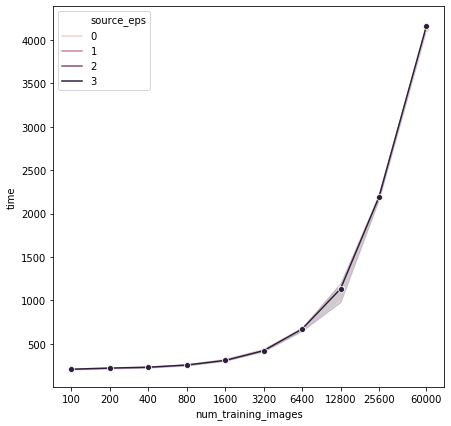

In [28]:
# how long does it take?
import matplotlib.pyplot as plt

plt, ax = plt.subplots(figsize=(7, 7))
ax.set_xscale('log', basex=2)
# ax.set_yscale('log', basey=2)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

sns.lineplot(x='num_training_images', y='time', hue='source_eps', marker='o', data=data, ci=99)
ax.set_xticks(data['num_training_images'].unique());